In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tejashvi14/medical-insurance-premium-prediction
!unzip medical-insurance-premium-prediction.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction
License(s): CC0-1.0
  0% 0.00/7.08k [00:00<?, ?B/s]
100% 7.08k/7.08k [00:00<00:00, 11.0MB/s]
Archive:  medical-insurance-premium-prediction.zip
  inflating: Medicalpremium.csv      


In [ ]:
data=pd.read_csv("Medicalpremium.csv")

In [ ]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [ ]:
data.dtypes

,0
Age,int64
Diabetes,int64
BloodPressureProblems,int64
AnyTransplants,int64
AnyChronicDiseases,int64
Height,int64
Weight,int64
KnownAllergies,int64
HistoryOfCancerInFamily,int64
NumberOfMajorSurgeries,int64


In [ ]:
data.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data["PremiumPrice"].value_counts()

,count
PremiumPrice,
23000,249
15000,202
28000,132
25000,103
29000,72
30000,47
35000,41
38000,34
31000,31


In [ ]:
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()


Age
[45 60 36 52 38 30 33 23 48 66 24 46 18 42 57 21 49 20 35 53 31 22 26 28
 64 50 44 58 43 25 54 63 61 41 55 19 40 32 27 34 59 29 47 39 37 51 56 62
 65]

Diabetes
[0 1]

BloodPressureProblems
[0 1]

AnyTransplants
[0 1]

AnyChronicDiseases
[0 1]

Height
[155 180 158 183 166 160 150 181 169 182 175 186 178 184 149 154 156 163
 151 172 162 153 168 152 161 157 147 173 179 165 174 185 177 164 148 170
 187 167 159 188 171 176 146 145]

Weight
[ 57  73  59  93  88  69  54  79  74  67  97  76  68  82  61  81  92  83
  58  96  91  85  55  78  56  77  63  75  72  70  80  60  53  94  84  87
  64  95  66  62  86  90  65 116 118 110 121  98 104  89  71 106  99 119
 107 129 109 100 127 132 120 128 114 123 111 103 126 102 105 124 122  52
  51 101]

KnownAllergies
[0 1]

HistoryOfCancerInFamily
[0 1]

NumberOfMajorSurgeries
[0 1 2 3]

PremiumPrice
[25000 29000 23000 28000 21000 15000 35000 30000 32000 19000 24000 38000
 31000 26000 39000 22000 40000 18000 34000 20000 16000 36000 27000 17000]



<Axes: xlabel='PremiumPrice', ylabel='Count'>

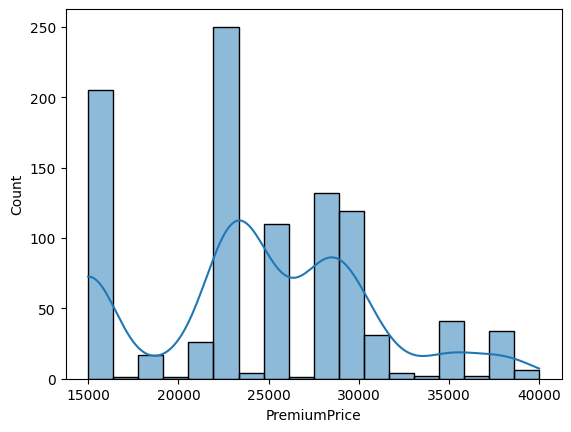

In [ ]:
sns.histplot(data=data["PremiumPrice"],kde=True)

<Axes: xlabel='count', ylabel='Diabetes'>

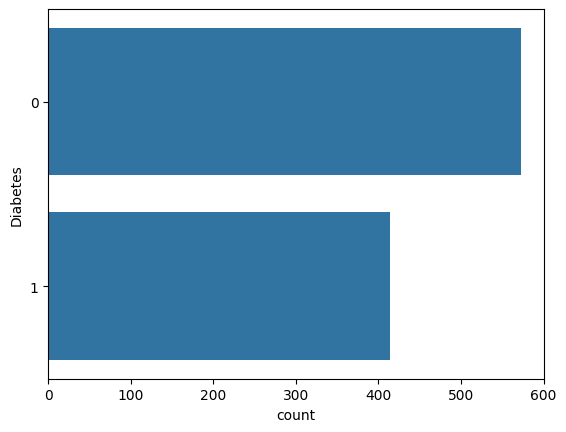

In [ ]:
sns.countplot(y=data["Diabetes"])

<Axes: xlabel='Diabetes', ylabel='Age'>

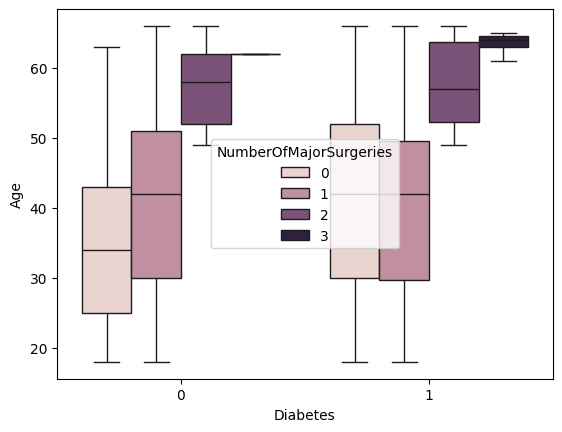

In [ ]:
sns.boxplot(x=data["Diabetes"],y=data["Age"],hue=data["NumberOfMajorSurgeries"])

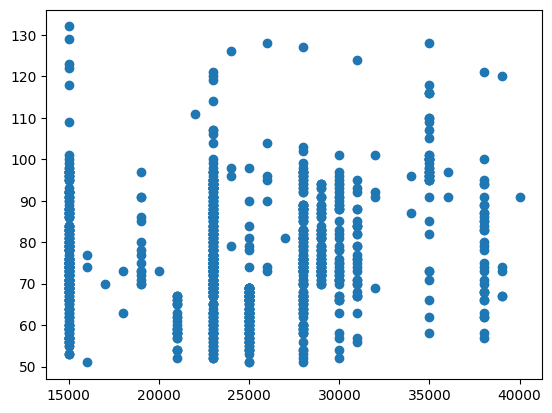

In [ ]:
plt.scatter(y=data["Weight"],x=data["PremiumPrice"])

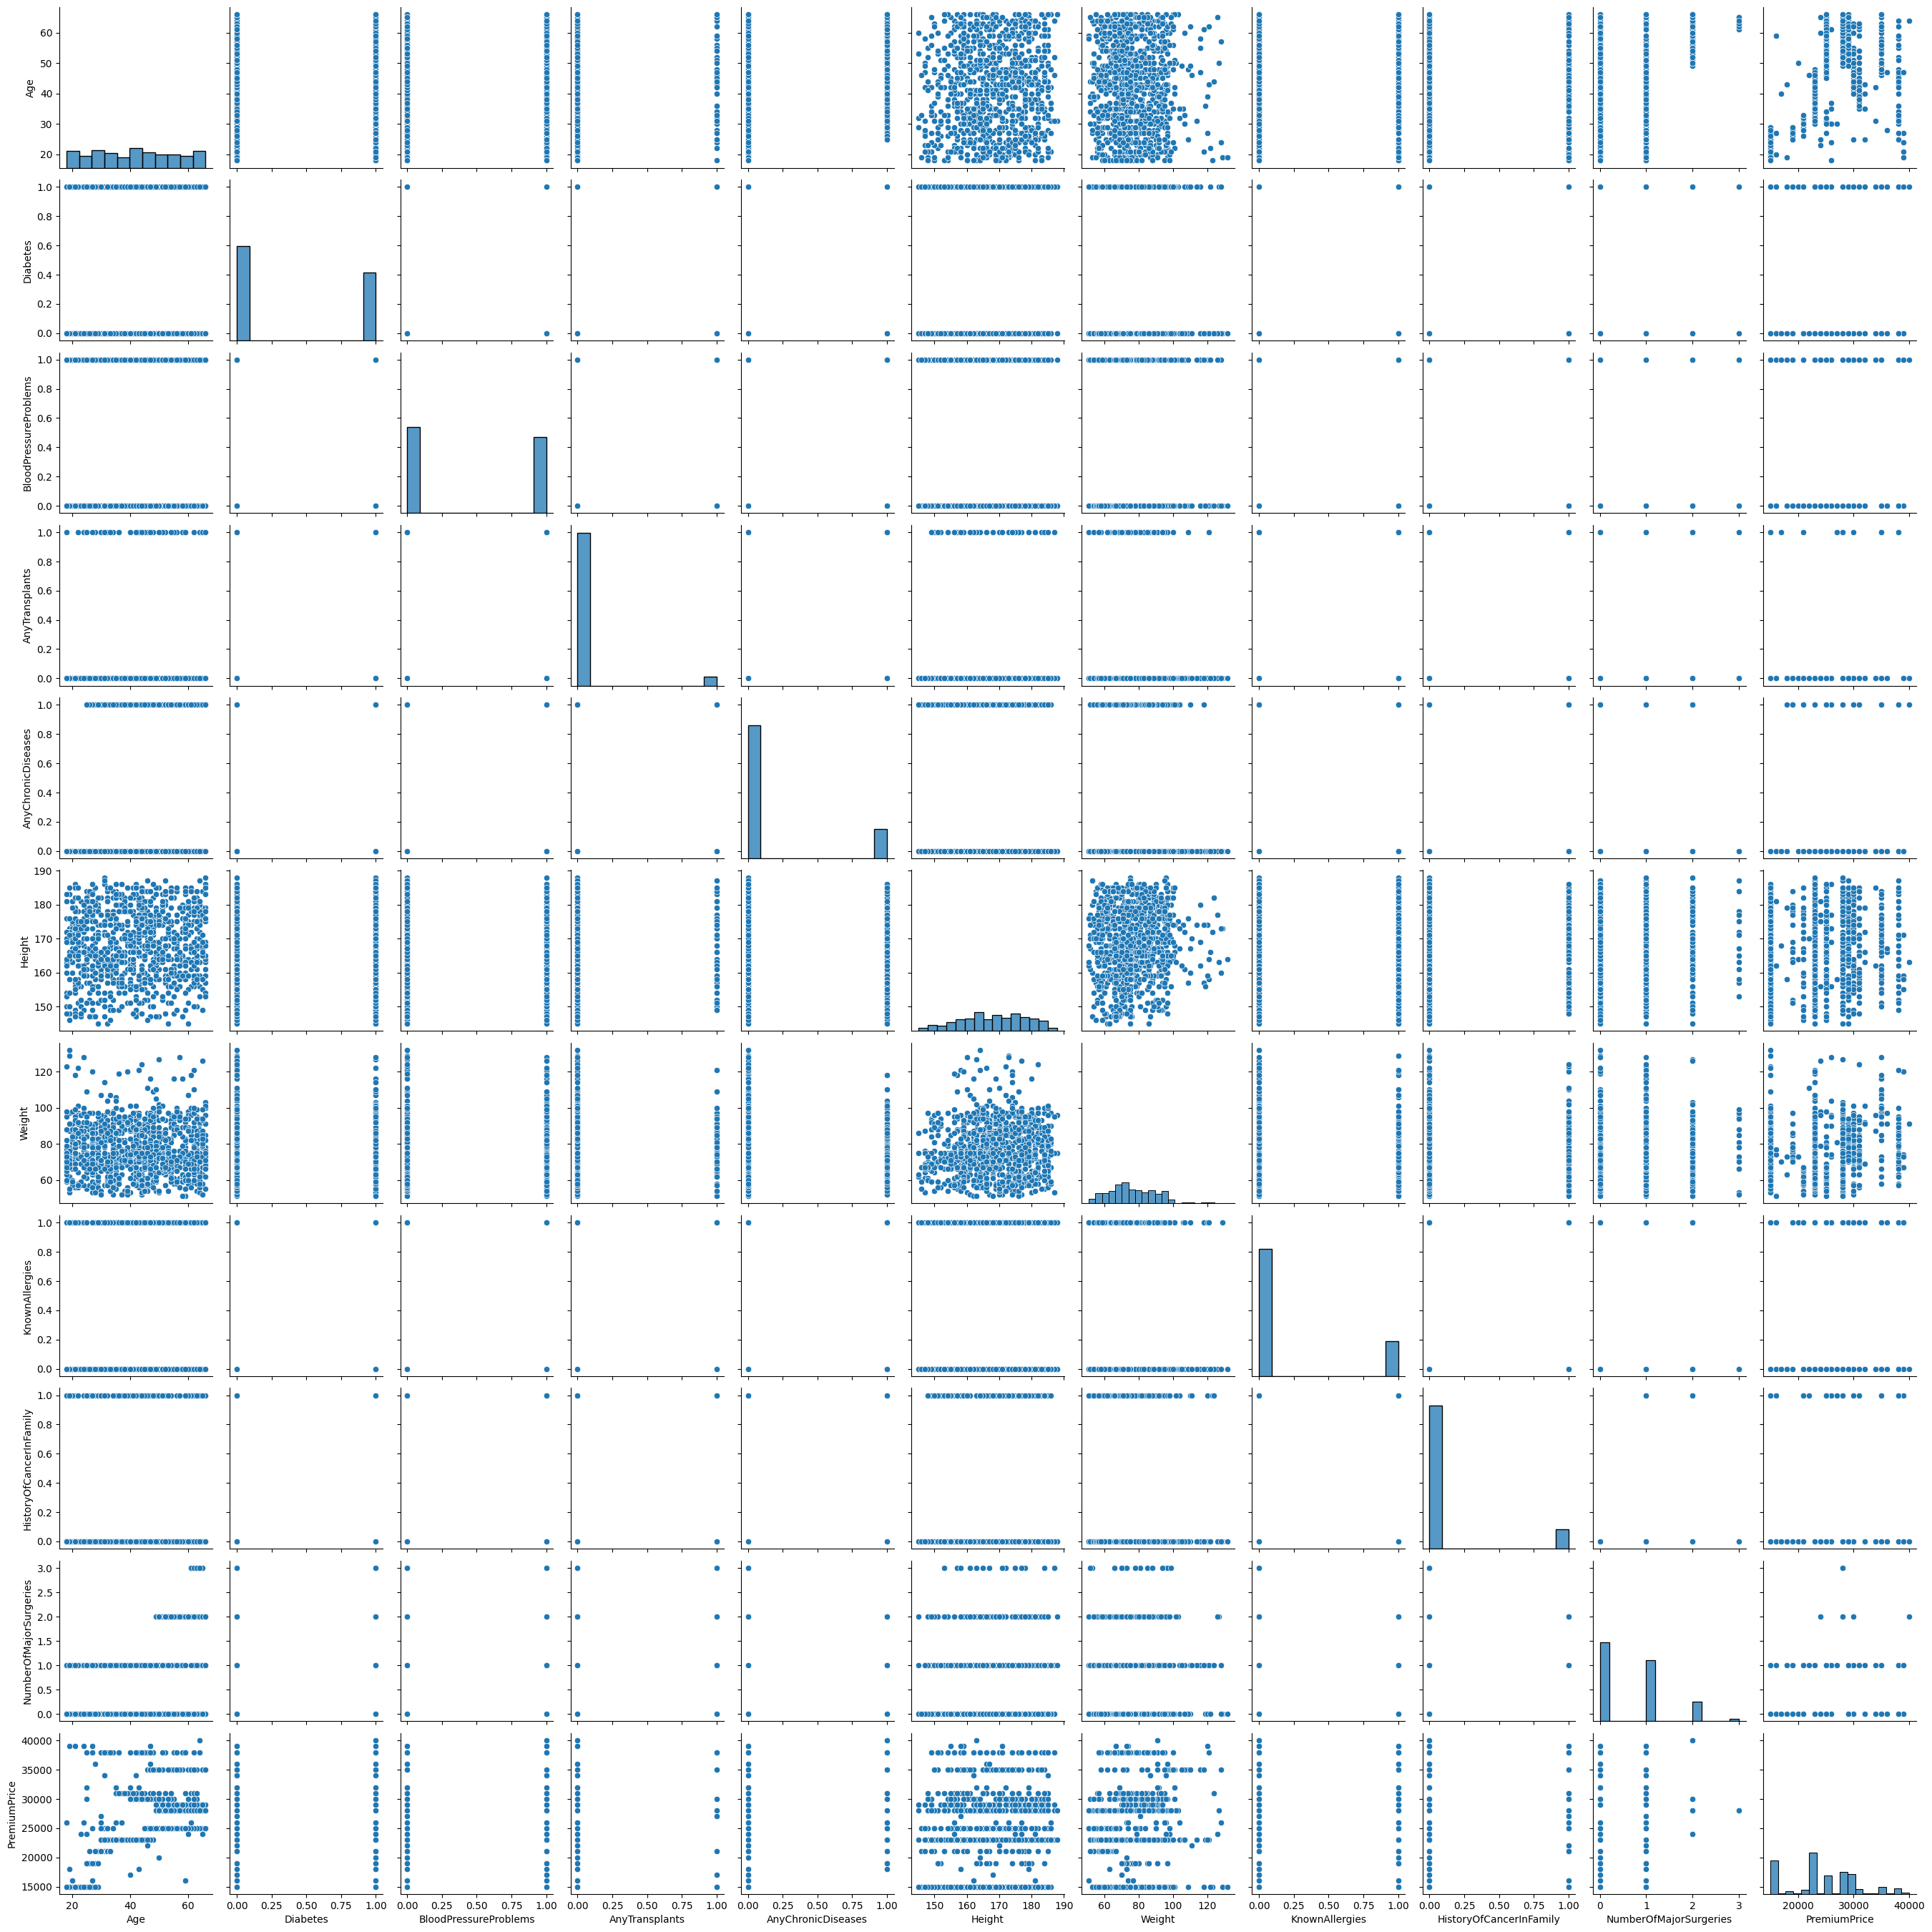

In [ ]:
sns.pairplot(data)

In [ ]:
corr_mat=data.corr()
corr_mat=corr_mat[(corr_mat>.8)|(corr_mat<-.8)]

high_corr=set()
for col in corr_mat.columns:
    high_corr=corr_mat.dropna()

high_corr

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice


<Axes: >

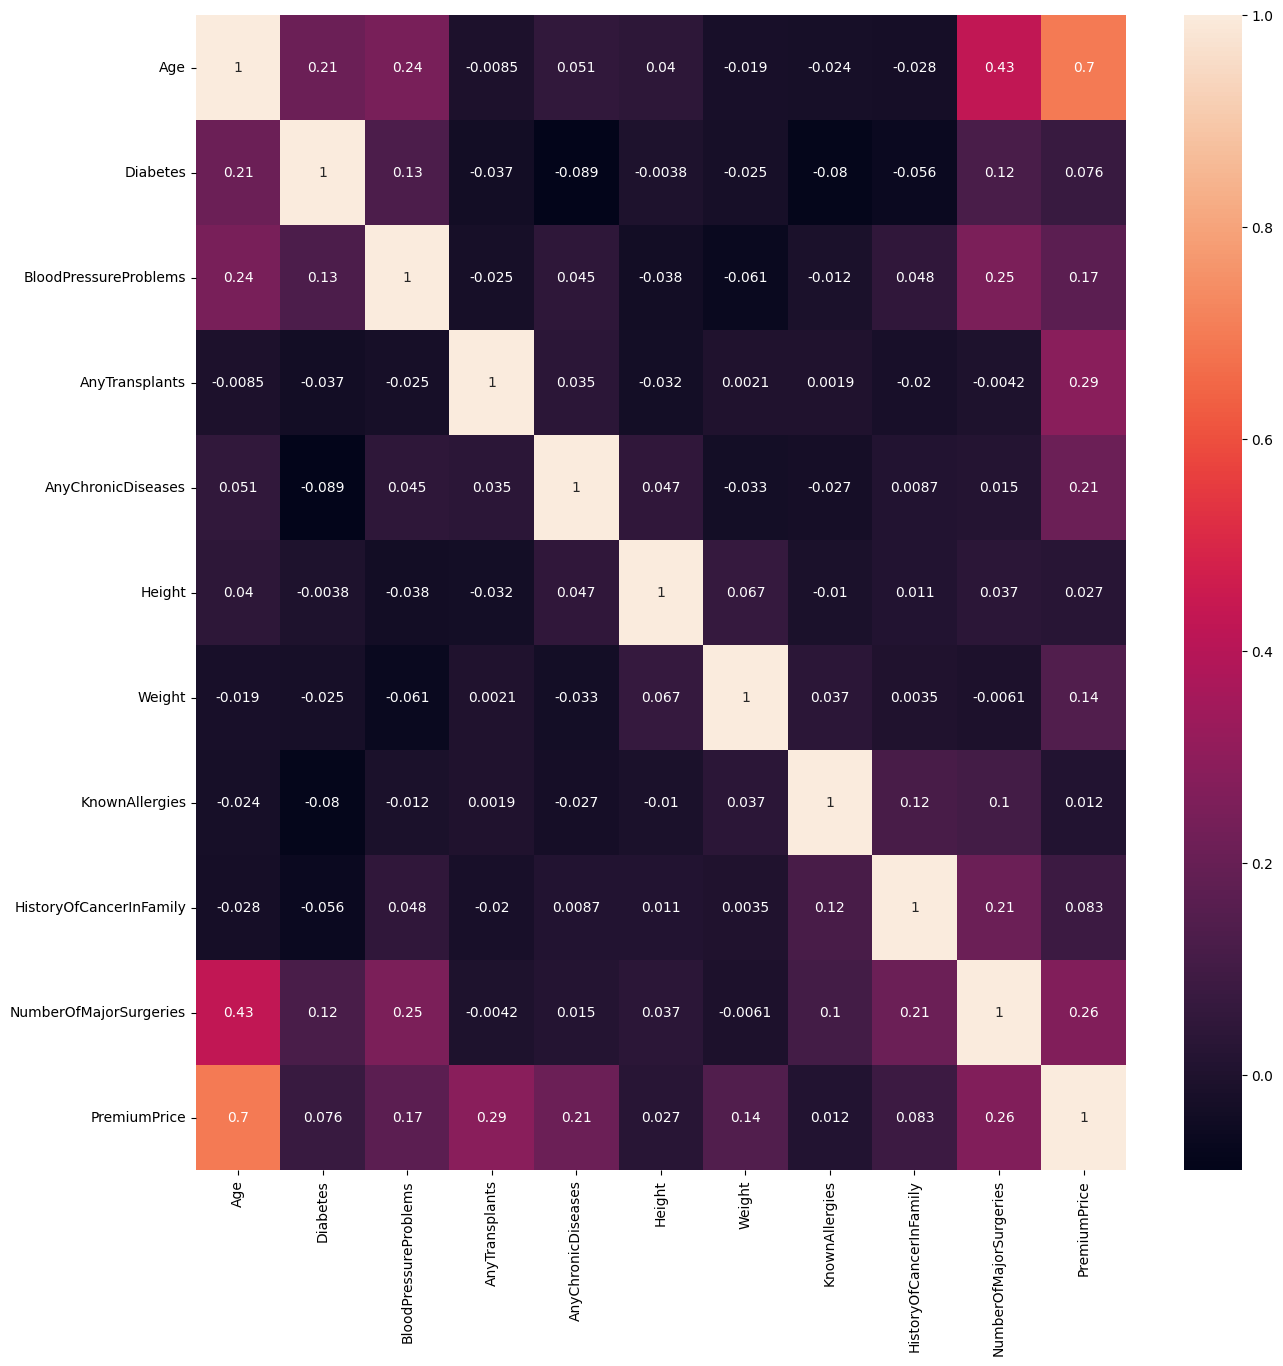

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

Not that high correleation,We would've removed column if it was above 8(My threshold)

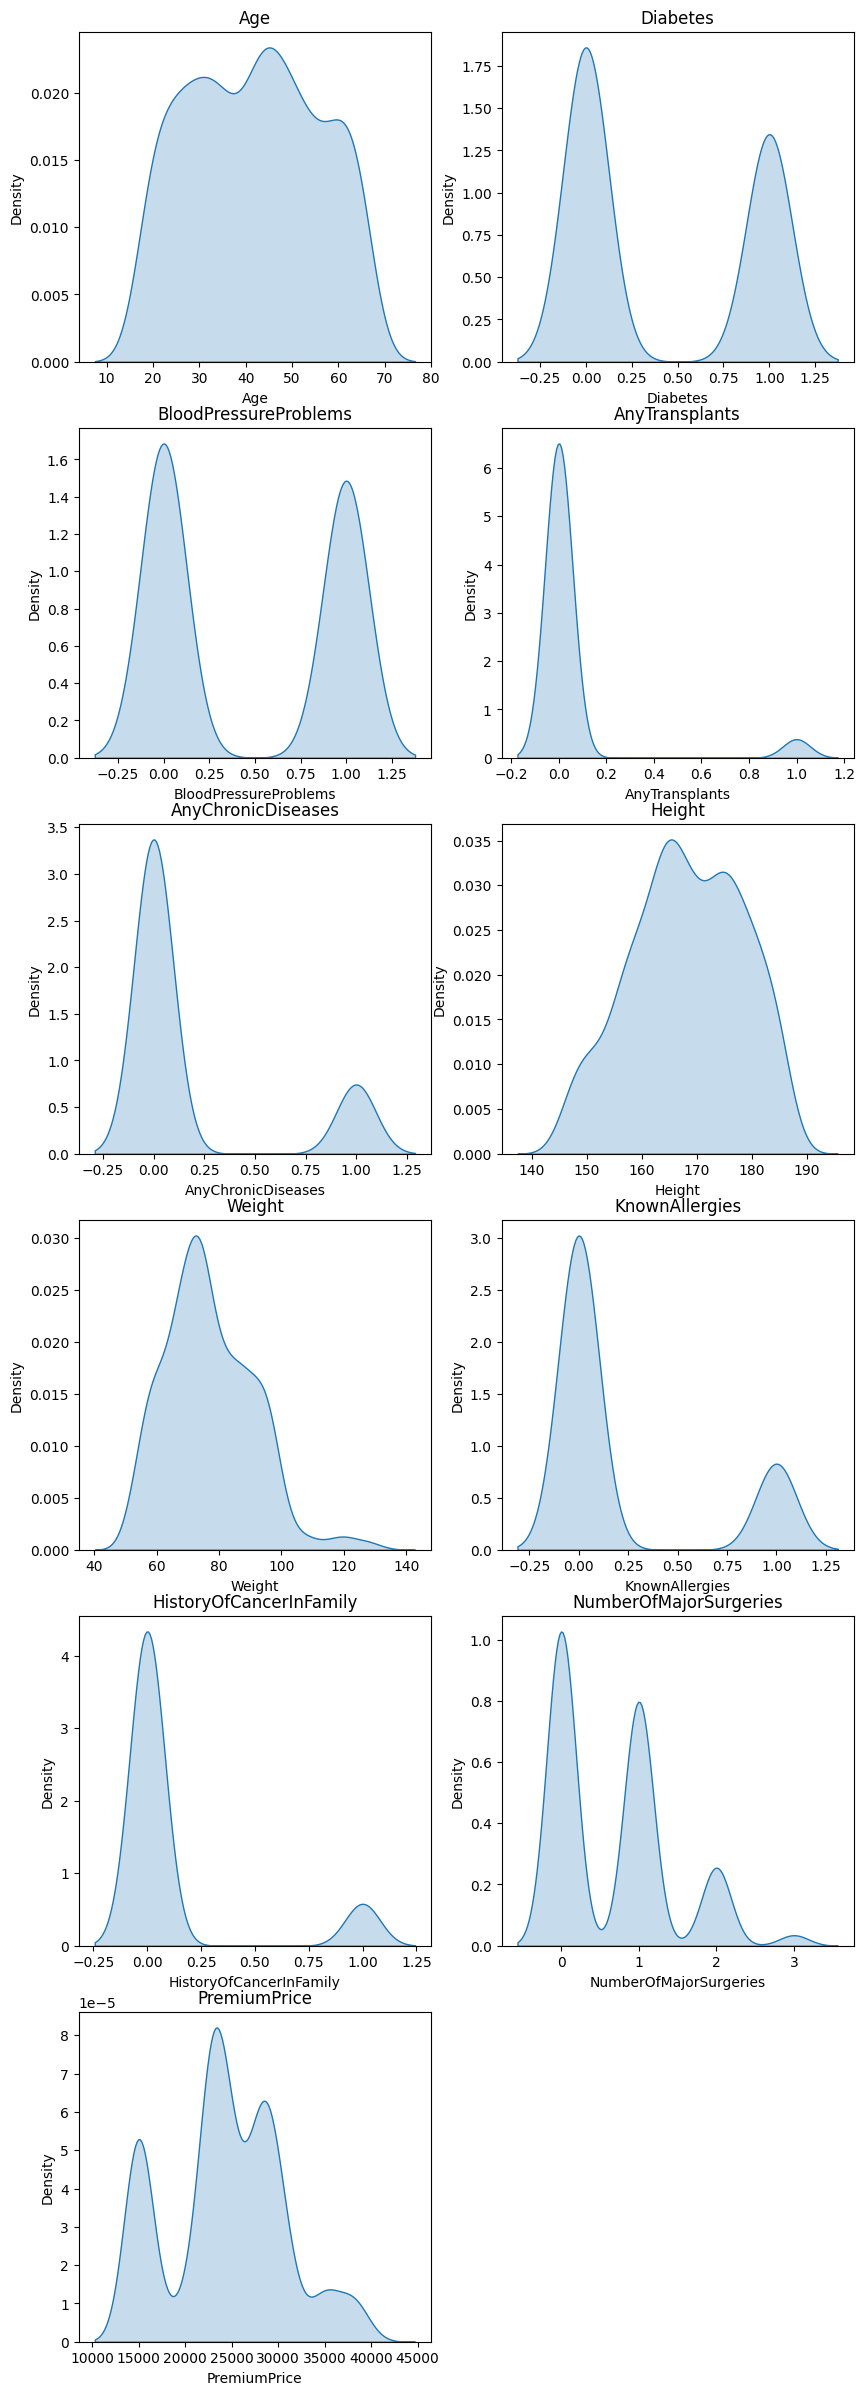

In [ ]:
num_cols = int(np.ceil(len(data.columns) / 2))

fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(10, 30))
axes = axes.ravel()

for i, col in enumerate(data.columns):
    sns.kdeplot(data[col], label=col, fill=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(len(data.columns), num_cols * 2):
    axes[j].axis('off')


Weight is kinda skewed so we use transformation

In [ ]:
data["Weight"]=np.log(data["Weight"])

Much Better Now

In [ ]:

!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
X.shape,y.shape

((986, 10), (986,))

In [ ]:
y.value_counts()

,count
PremiumPrice,
23000,249
15000,202
28000,132
25000,103
29000,72
30000,47
35000,41
38000,34
31000,31


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
762,19,0,0,0,0,146,4.007333,0,0,0
334,31,0,1,0,0,162,4.465908,0,0,0
890,58,1,0,0,0,147,4.317488,0,0,0
529,31,0,1,0,0,171,4.442651,0,0,0
468,26,1,1,0,0,167,4.248495,0,1,1
...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,155,4.060443,0,0,0
270,46,0,1,0,1,166,4.060443,0,0,1
860,61,1,0,0,0,161,4.189655,0,0,3
435,37,1,0,0,0,174,4.143135,1,1,1


In [ ]:
X_test.shape,X_train.shape,y_train.shape,y_test.shape

((198, 10), (788, 10), (788,), (198,))

In [ ]:
print(y_train.value_counts())

PremiumPrice
23000    205
15000    160
28000    108
25000     85
29000     54
30000     36
35000     31
38000     25
31000     23
21000     20
19000     13
26000      6
39000      5
24000      4
32000      4
16000      2
34000      1
27000      1
18000      1
36000      1
20000      1
40000      1
17000      1
Name: count, dtype: int64


In [ ]:
print("Original class distribution:")
print(y_train.value_counts())

# Group rare classes into a single class
class_counts = y_train.value_counts()
rare_classes = class_counts[class_counts < 5].index
y_train = y_train.replace(rare_classes, "Rare")


In [ ]:
print("\nClass distribution after grouping rare classes:")
print(y_train.value_counts())

In [ ]:
print("\nClass distribution after grouping rare classes:")
print(y_train.value_counts())

smote = SMOTE(random_state=42, k_neighbors=1)

smote_enn = SMOTEENN(random_state=42, smote=smote)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)

In [ ]:
print("\nResampled class distribution:")
print(y_train.value_counts())

In [ ]:
models = {
    "Logistic Regression": ( LogisticRegression(), {"C": [0.1, 1.0, 10.0], "penalty": ["l2"], "solver": ["liblinear", "lbfgs"]} ),
    "Support Vector Classifier (SVC)": (SVC(), {"C": [0.1, 1.0, 10.0], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]} ),
    "Decision Tree": ( DecisionTreeClassifier(),{"max_depth": [5, 10, 15, 20], "min_samples_split": [2, 5, 10]} ),
    "Random Forest": ( RandomForestClassifier(),{"n_estimators": [10, 50, 100, 200], "max_depth": [None, 10, 20]}),
    "K-Nearest Neighbors (KNN)": ( KNeighborsClassifier(),{"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}),
    "Naive Bayes": (GaussianNB(),{}),
    "Linear Discriminant Analysis (LDA)": ( LinearDiscriminantAnalysis(),{"solver": ["svd", "lsqr", "eigen"]})
}

In [ ]:
results = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for model_name, (model, param_grid) in models.items():
    print(f"Search for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv, verbose=1)
    grid_search.fit(X_train, y_train)

    results[model_name] = {
        "Best Estimator": grid_search.best_estimator_,
        "Best Parameters": grid_search.best_params_,
        "Best Score": grid_search.best_score_
    }

Model: Logistic Regression
Best Parameter: {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score (Negative MSE): -0.8076


In [ ]:
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Best Cross-Validation Accuracy: {result['Best Score']:.4f}"

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       15000       0.89      0.38      0.53        42
       16000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         0
       18000       0.00      0.00      0.00         1
       19000       0.67      1.00      0.80         2
       20000       0.00      0.00      0.00         0
       21000       0.33      0.67      0.44         6
       22000       0.00      0.00      0.00         1
       23000       0.81      0.30      0.43        44
       24000       0.00      0.00      0.00         0
       25000       0.63      0.67      0.65        18
       26000       0.00      0.00      0.00         1
       27000       0.00      0.00      0.00         0
       28000       1.00      1.00      1.00        24
       29000       0.80      0.67      0.73        18
       30000       0.56      0.45      0.50        11
       31000       0.46      0.75 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
for model_name, result in results.items():
    best_model = result['Best Estimator']
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Test Set Accuracy: {accuracy:.4f}")

In [ ]:
for model_name, result in results.items():
    best_model = result['Best Estimator']
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"\nClassification Report for {model_name}:")
    print(report)
    print("-" * 60)

Original class distribution:
PremiumPrice
15000    205
30000    205
40000    205
20000    205
26000    205
36000    205
32000    205
18000    205
27000    205
24000    205
16000    205
21000    205
34000    205
39000    205
25000    205
31000    205
28000    205
19000    205
35000    205
38000    205
23000    205
29000    205
17000    205
Name: count, dtype: int64

Class distribution after grouping rare classes:
PremiumPrice
15000    205
30000    205
40000    205
20000    205
26000    205
36000    205
32000    205
18000    205
27000    205
24000    205
16000    205
21000    205
34000    205
39000    205
25000    205
31000    205
28000    205
19000    205
35000    205
38000    205
23000    205
29000    205
17000    205
Name: count, dtype: int64

Resampled class distribution:
PremiumPrice
27000    205
26000    205
39000    205
38000    205
36000    205
34000    205
32000    205
31000    205
16000    205
40000    205
24000    205
20000    205
19000    205
18000    205
17000    205
30000  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_